<a href="https://colab.research.google.com/github/Ninja-draw-coder/PythonProjects/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Heart Disease Prediction**

Objective
1. Provide the best performing model to determine probability for a patient having a heart disease or attack.

2. Providing the most important drivers for a heart disease or attack.

# **Phase 1: Data Understanding & Preprocessing**
Step 1. Import Libraries and Load Dataset

In [ ]:
import pandas
import numpy
import matplotlib
import seaborn
import sklearn

#Load data set
df = pandas.read_csv('heartdisease.csv')
print(df.head())



   HeartDiseaseorAttack  HighBP  HighChol   BMI  Smoker  Diabetes  \
0                   0.0     1.0       1.0  40.0     1.0       0.0   
1                   0.0     0.0       0.0  25.0     1.0       0.0   
2                   0.0     1.0       1.0  28.0     0.0       0.0   
3                   0.0     1.0       0.0  27.0     0.0       0.0   
4                   0.0     1.0       1.0  24.0     0.0       0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  MentHlth  PhysHlth  Sex  \
0           0.0     0.0      1.0                0.0      18.0      15.0  0.0   
1           1.0     0.0      0.0                0.0       0.0       0.0  0.0   
2           0.0     1.0      0.0                0.0      30.0      30.0  0.0   
3           1.0     1.0      1.0                0.0       0.0       0.0  0.0   
4           1.0     1.0      1.0                0.0       3.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.

Step 2.1 Data Understanding & Preprocessing


In [ ]:
print(df.head())
print(df.info())
print(df.describe())

   HeartDiseaseorAttack  HighBP  HighChol   BMI  Smoker  Diabetes  \
0                   0.0     1.0       1.0  40.0     1.0       0.0   
1                   0.0     0.0       0.0  25.0     1.0       0.0   
2                   0.0     1.0       1.0  28.0     0.0       0.0   
3                   0.0     1.0       0.0  27.0     0.0       0.0   
4                   0.0     1.0       1.0  24.0     0.0       0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  MentHlth  PhysHlth  Sex  \
0           0.0     0.0      1.0                0.0      18.0      15.0  0.0   
1           1.0     0.0      0.0                0.0       0.0       0.0  0.0   
2           0.0     1.0      0.0                0.0      30.0      30.0  0.0   
3           1.0     1.0      1.0                0.0       0.0       0.0  0.0   
4           1.0     1.0      1.0                0.0       3.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.

Step 2.2: Handle Missing Values

Action: Identify and address missing values if any.

Step 2.3: Correcting Data Types (if necessary)

Action: Ensure all columns have the appropriate data type. For instance, binary flags (HighBP, HighChol, etc.) should ideally be treated as categorical (or boolean for some operations) even if they're loaded as integers. Age, Education, and Income are binned categories and should be treated as such.

In [ ]:
print(df.isnull().sum())
print(df.dtypes)

# Convert binary flags to category type
binary_cols = ['HighBP', 'HighChol', 'Smoker', 'Diabetes', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'HeartDiseaseorAttack']
for col in binary_cols:
    df[col] = df[col].astype('category')

# Convert binned numeric to category type
binned_cols = ['Age', 'Education', 'Income', 'Sex']
for col in binned_cols:
    df[col] = df[col].astype('category')

# Define mappings for binary columns to descriptive labels
binary_value_mappings = {
    0: 'No',
    1: 'Yes'
}

for col in binary_cols:
    # Apply descriptive labels based on common binary 0/1 meaning
    if col == 'HeartDiseaseorAttack':
        df[col] = df[col].map({0: 'No Heart Disease', 1: 'Heart Disease'})
    elif col == 'Sex':
        df[col] = df[col].map({0: 'Female', 1: 'Male'})
    else: # For other binary columns like HighBP, HighChol, Smoker etc.
        df[col] = df[col].map(binary_value_mappings)

    # Crucially, ensure the column is set to 'category' dtype
    df[col] = df[col].astype('category')

# Convert binary flags to category type and map 0/1 to descriptive labels
binary_cols_to_map = {
    'HeartDiseaseorAttack': {0: 'No Heart Disease', 1: 'Heart Disease'},
    'HighBP': {0: 'No High BP', 1: 'High BP'},
    'HighChol': {0: 'No High Chol', 1: 'High Chol'},
    'Smoker': {0: 'Non-Smoker', 1: 'Smoker'},
    'Diabetes': {0: 'No Diabetes', 1: 'Diabetes'},
    'Fruits': {0: 'No Fruits', 1: 'Eats Fruits'},
    'Veggies': {0: 'No Veggies', 1: 'Eats Veggies'},
    'HvyAlcoholConsump': {0: 'No Heavy Alcohol', 1: 'Heavy Alcohol'},
    'Sex': {0: 'Female', 1: 'Male'} # Assuming 0 for Female, 1 for Male based on common conventions
}
for col, mapping in binary_cols_to_map.items():
    df[col] = df[col].astype('category').map(mapping)

# Convert other binned numeric columns to category type (Age, Education, Income)
binned_cols = ['Age', 'Education', 'Income']
for col in binned_cols:
    df[col] = df[col].astype('category')

HeartDiseaseorAttack    253680
HighBP                  253680
HighChol                253680
BMI                          0
Smoker                  253680
Diabetes                253680
PhysActivity                 0
Fruits                  253680
Veggies                 253680
HvyAlcoholConsump       253680
MentHlth                     0
PhysHlth                     0
Sex                     253680
Age                          0
Education                    0
Income                       0
dtype: int64
HeartDiseaseorAttack    category
HighBP                  category
HighChol                category
BMI                      float64
Smoker                  category
Diabetes                category
PhysActivity             float64
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
MentHlth                 float64
PhysHlth                 float64
Sex                     category
Age                     category
Education               categ

# **Phase 2: Exploratory Data Analysis (EDA)**
Step 1: Univariate Analysis
1.1 Analysis of Numerical features BMI,Mental health , Physical health

Action: Understand the distribution of individual features.



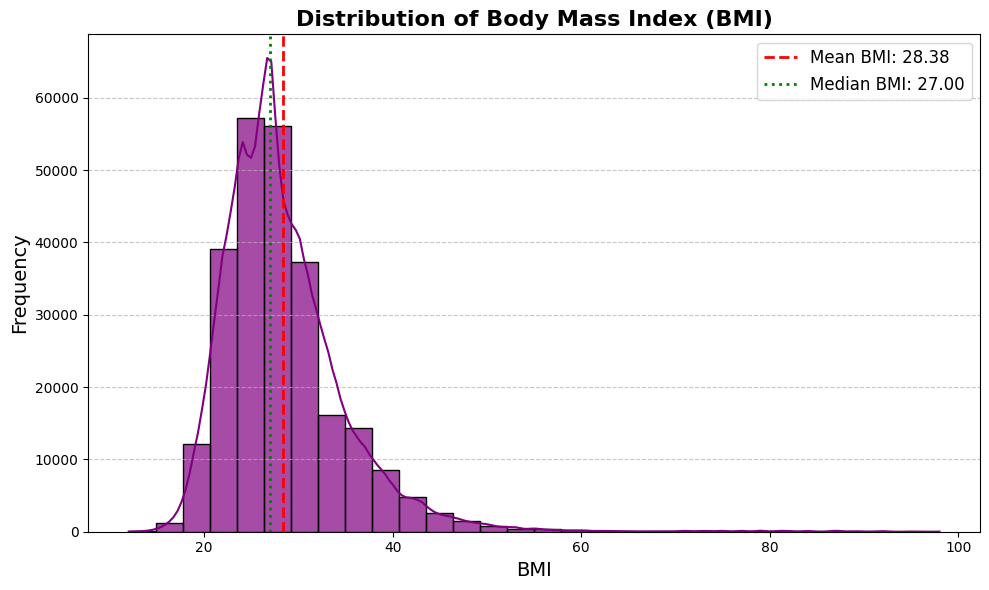

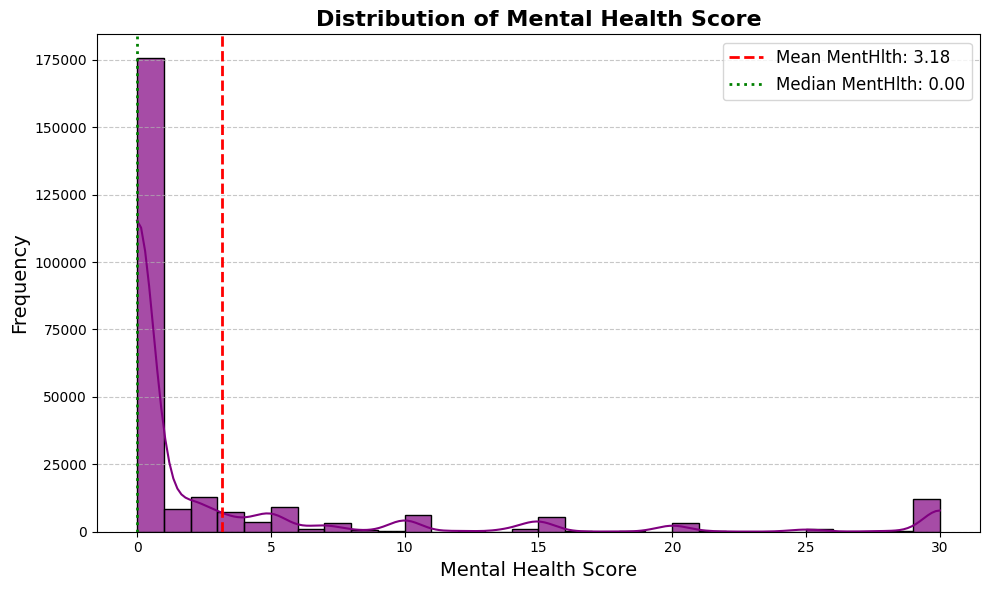

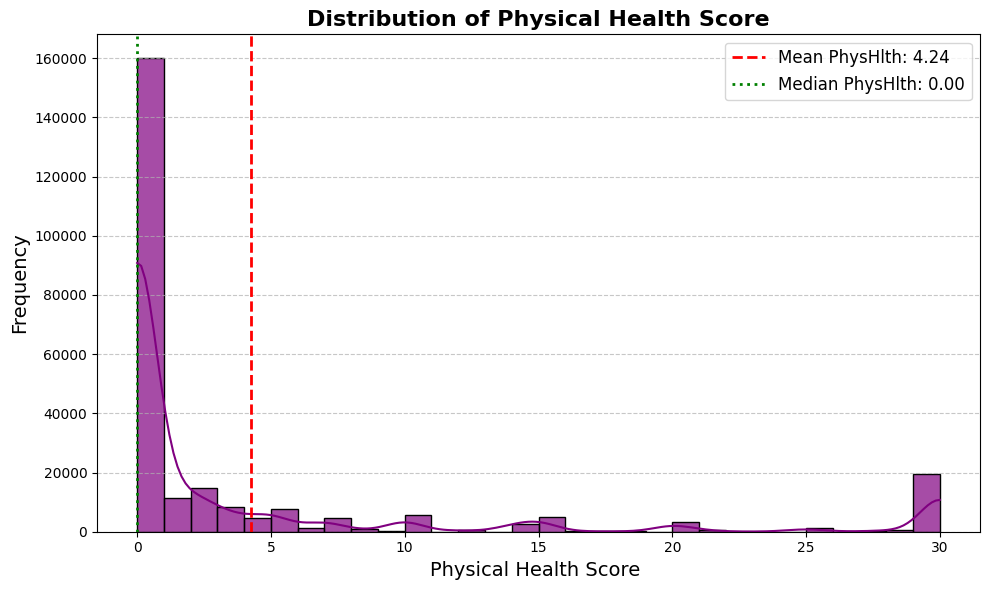

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features
numerical_cols = ['BMI', 'MentHlth', 'PhysHlth']

# Histogram for BMI
# Calculate mean and median BMI
mean_bmi = df['BMI'].mean()
median_bmi = df['BMI'].median()

plt.figure(figsize=(10, 6))

# Create the histogram with KDE
sns.histplot(df['BMI'], bins=30, kde=True, color='purple', edgecolor='black', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_bmi, color='red', linestyle='--', linewidth=2, label=f'Mean BMI: {mean_bmi:.2f}')
plt.axvline(median_bmi, color='green', linestyle=':', linewidth=2, label=f'Median BMI: {median_bmi:.2f}')

# Customize title and labels
plt.title('Distribution of Body Mass Index (BMI)', fontsize=16, fontweight='bold')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a legend
plt.legend(fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# show the plot
plt.show()

# KDE plot for MentHlth
# Calculate mean and median for MentHlth
mean_menthlth = df['MentHlth'].mean()
median_menthlth = df['MentHlth'].median()

plt.figure(figsize=(10, 6))

# Create the histogram with KDE for MentHlth
sns.histplot(df['MentHlth'], bins=30, kde=True, color='purple', edgecolor='black', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_menthlth, color='red', linestyle='--', linewidth=2, label=f'Mean MentHlth: {mean_menthlth:.2f}')
plt.axvline(median_menthlth, color='green', linestyle=':', linewidth=2, label=f'Median MentHlth: {median_menthlth:.2f}')

# Customize title and labels
plt.title('Distribution of Mental Health Score', fontsize=16, fontweight='bold')
plt.xlabel('Mental Health Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a legend
plt.legend(fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()
plt.show()

# KDE plot for PhysHlth
# Calculate mean and median for MentHlth
mean_menthlth = df['PhysHlth'].mean()
median_menthlth = df['PhysHlth'].median()

plt.figure(figsize=(10, 6))

# Create the histogram with KDE for MentHlth
sns.histplot(df['PhysHlth'], bins=30, kde=True, color='purple', edgecolor='black', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_menthlth, color='red', linestyle='--', linewidth=2, label=f'Mean PhysHlth: {mean_menthlth:.2f}')
plt.axvline(median_menthlth, color='green', linestyle=':', linewidth=2, label=f'Median PhysHlth: {median_menthlth:.2f}')

# Customize title and labels
plt.title('Distribution of Physical Health Score', fontsize=16, fontweight='bold')
plt.xlabel('Physical Health Score ', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a legend
plt.legend(fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

Univariate Analysis
1.2 Analysis of Categorical Binned Variables (Age, Education, Income)
Bar plots showing counts per bin.

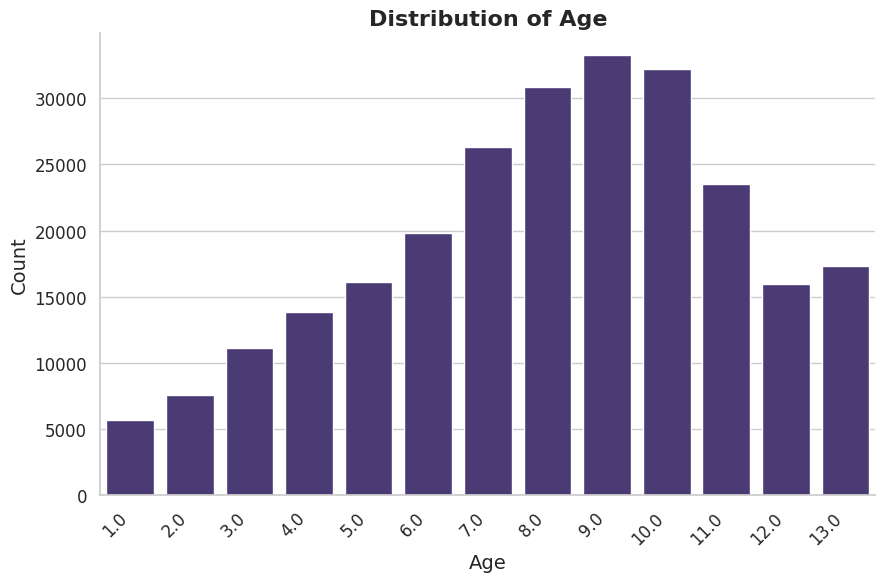

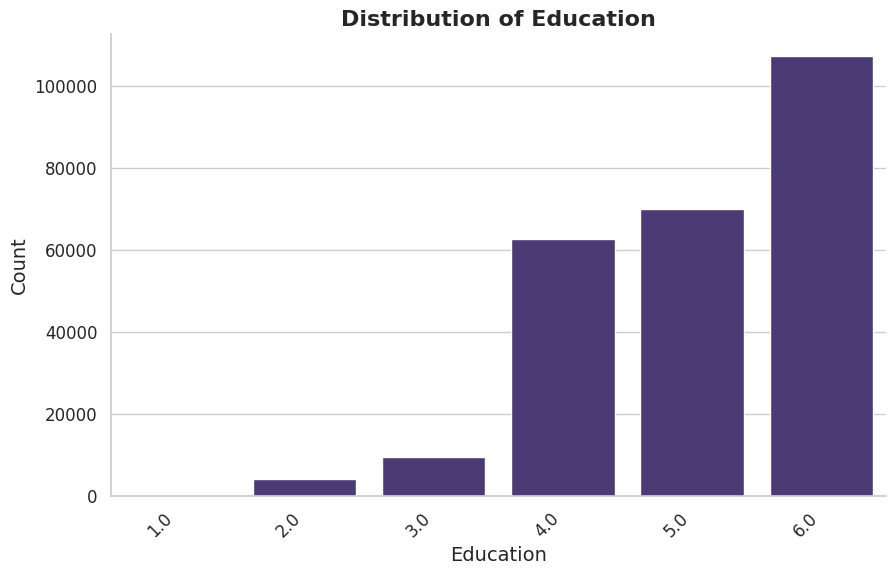

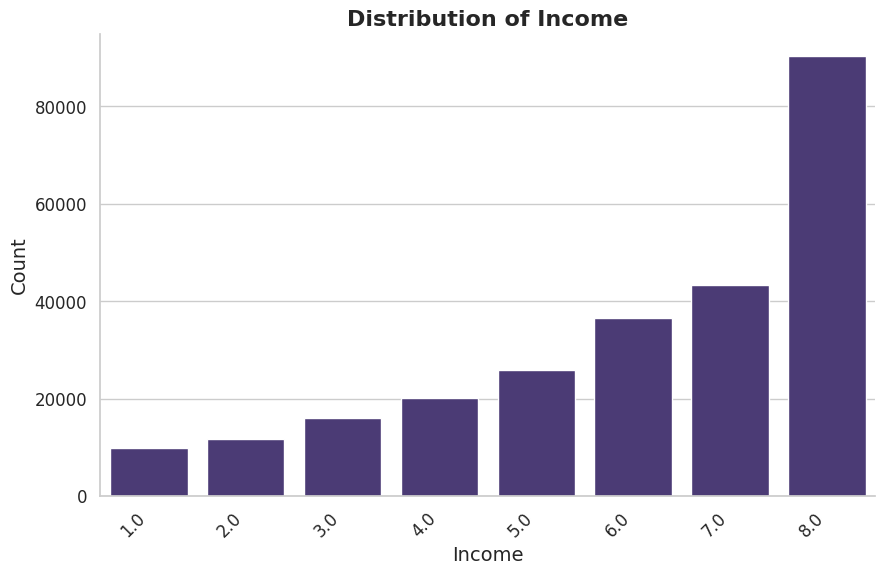

In [ ]:
binned_cols = ['Age', 'Education', 'Income']
for col in binned_cols:
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")  # Or style="darkgrid", "white", "ticks"
    sns.set_palette('viridis')  # Or 'coolwarm', 'cubehelix', 'deep', etc.

    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col,fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right',fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine()  # Removes top and right spines for cleaner look
    plt.show()




/tmp/ipython-input-8-1210810667.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette=color_map)


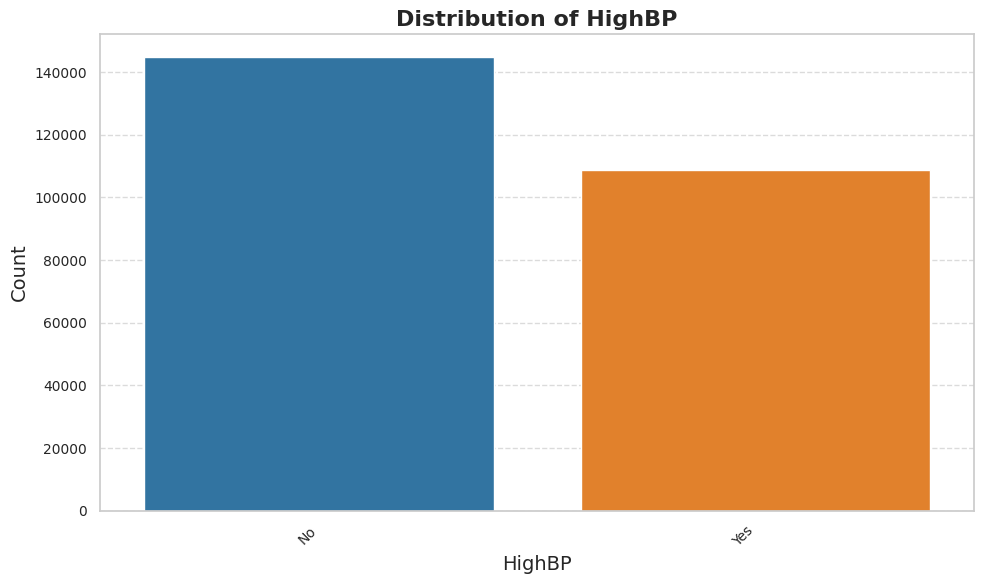

/tmp/ipython-input-8-1210810667.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette=color_map)


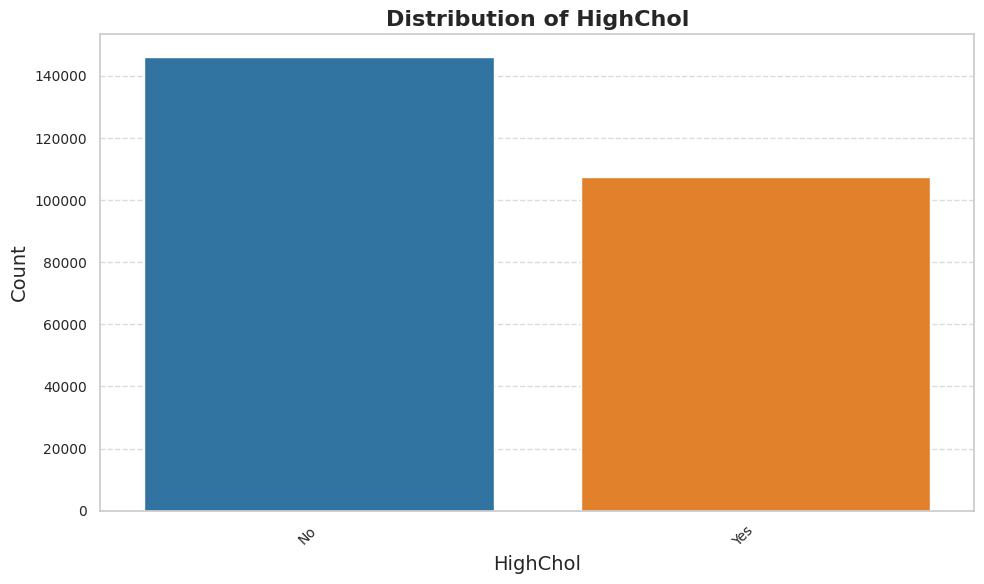

/tmp/ipython-input-8-1210810667.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette=color_map)


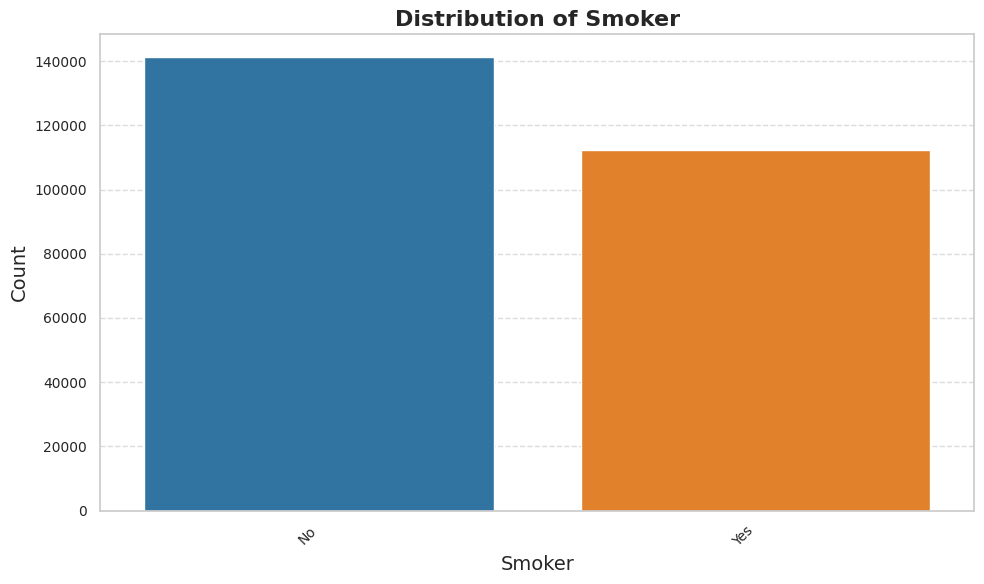

/tmp/ipython-input-8-1210810667.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette=color_map)


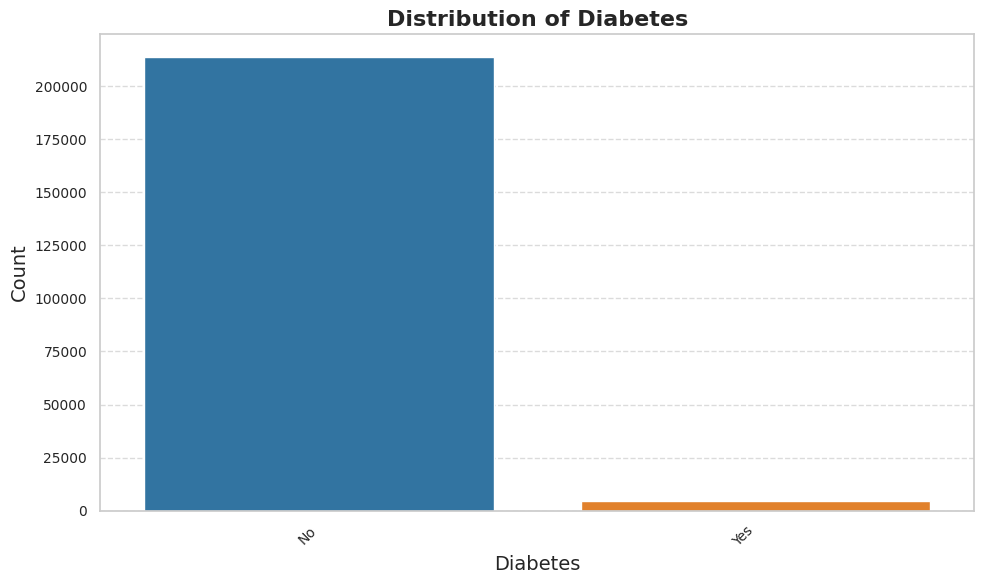

/tmp/ipython-input-8-1210810667.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette=color_map)


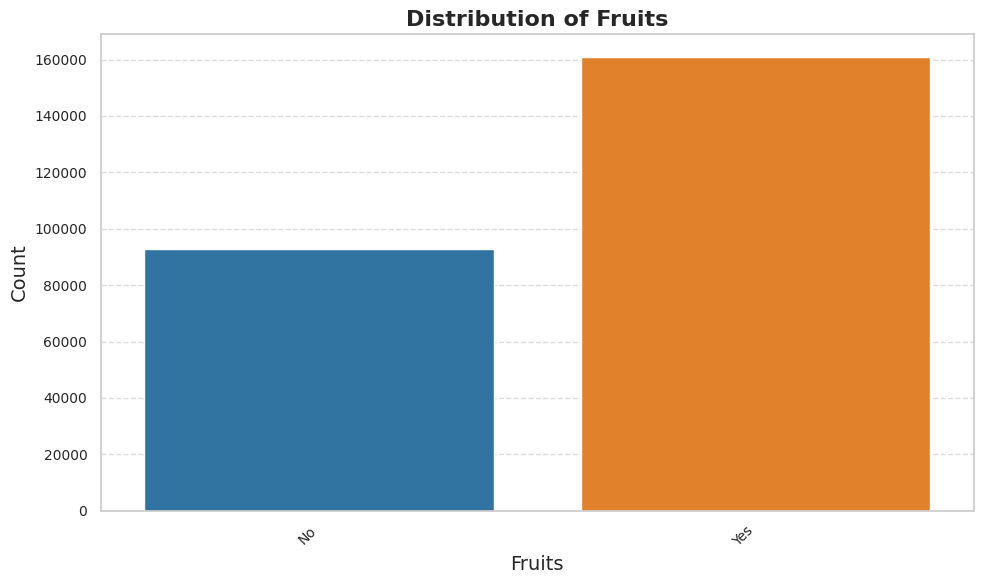

/tmp/ipython-input-8-1210810667.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette=color_map)


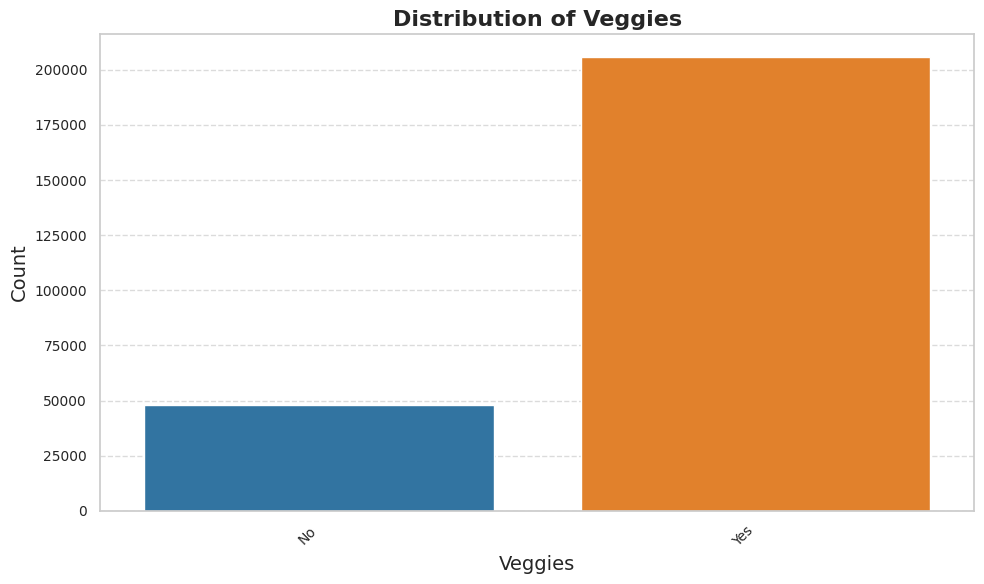

/tmp/ipython-input-8-1210810667.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette=color_map)


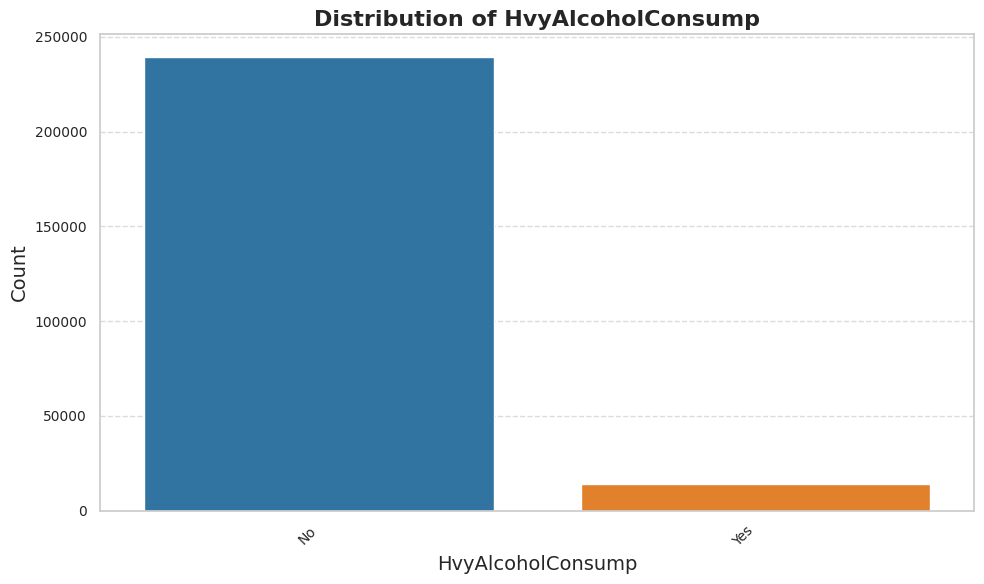

/tmp/ipython-input-8-1210810667.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette=color_map)


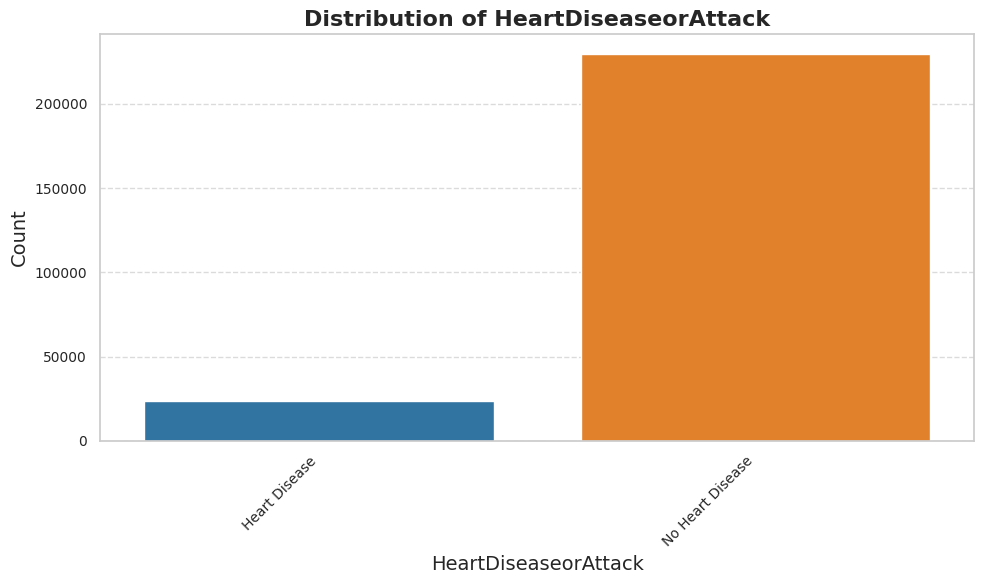

/tmp/ipython-input-8-1210810667.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette=color_map)


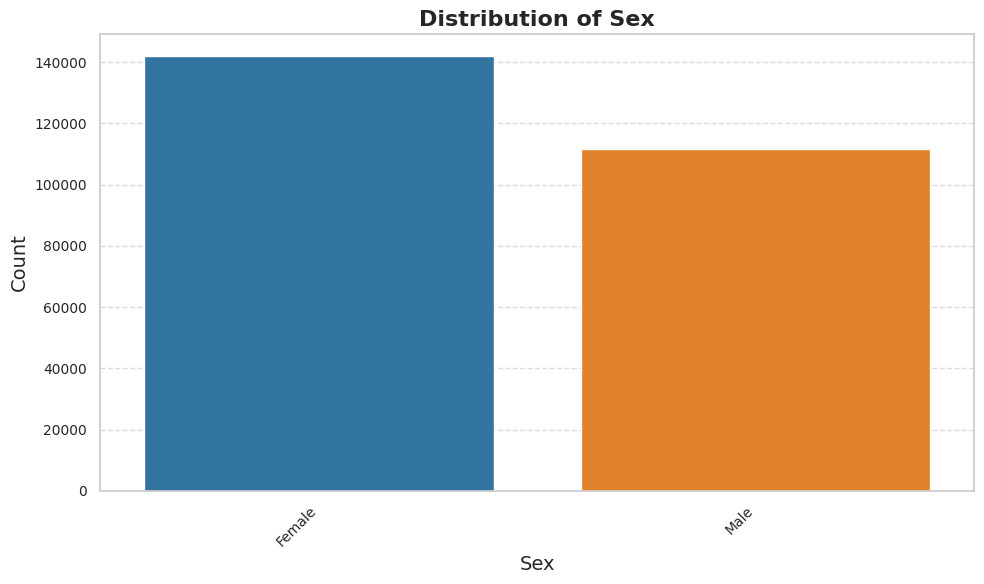

In [ ]:
##import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

# Load the dataset
#df = pd.read_csv('heartdisease.csv')

# Define the specific list of categorical columns for univariate analysis
target_cols_for_univariate = ['HighBP', 'HighChol', 'Smoker', 'Diabetes', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'HeartDiseaseorAttack','Sex']

# Define mappings for binary columns to descriptive labels
binary_value_mappings = {
    0: 'No',
    1: 'Yes'
}
# Specific mapping for Sex (if it were in the list)
sex_mapping = {0: 'Female', 1: 'Male'}

# Process columns to ensure correct categorical type and labels
for col in target_cols_for_univariate:
    # Apply descriptive labels based on common binary 0/1 meaning
    if col == 'HeartDiseaseorAttack':
        df[col] = df[col].map({0: 'No Heart Disease', 1: 'Heart Disease'})
    elif col == 'Sex':
        df[col] = df[col].map({0: 'Female', 1: 'Male'})
    else: # For other binary columns like HighBP, HighChol, Smoker etc.
        df[col] = df[col].map(binary_value_mappings)

    # Crucially, ensure the column is set to 'category' dtype
    df[col] = df[col].astype('category')

# Define a color palette for univariate plots
univariate_palette_colors = sns.color_palette('tab10', n_colors=10) # Get 10 colors from tab10

# Plotting univariate analysis for each specified categorical feature
for col in target_cols_for_univariate:
    plt.figure(figsize=(6, 4))

    # Get unique categories and map them to colors
    # Now .cat.categories should work because we explicitly made it 'category' dtype
    categories = df[col].cat.categories
    num_categories = len(categories)
    colors = [univariate_palette_colors[i % len(univariate_palette_colors)] for i in range(num_categories)]
    color_map = dict(zip(categories, colors))

    # Create the countplot using the explicit color mapping
    sns.countplot(x=df[col], palette=color_map)

    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'{col}_Univariate_Distribution.png')
    plt.show()
    plt.close()

# **•	Multivariate Analysis:**
o	Correlation Analysis: Compute the correlation matrix between numerical features and the target variable. Visualize this using a heatmap to identify strong relationships.
o	Target Variable Analysis: Analyze the distribution of HeartDiseaseorAttack. This is crucial for understanding class imbalance. Plot the count of positive and negative cases.
o	Feature-Target Relationships: Use box plots (for numerical features vs. binary target) and stacked bar plots (for categorical features vs. binary target) to visualize how each feature relates to the likelihood of heart disease.


/tmp/ipython-input-13-3699748081.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, loc='upper right', fontsize=10)


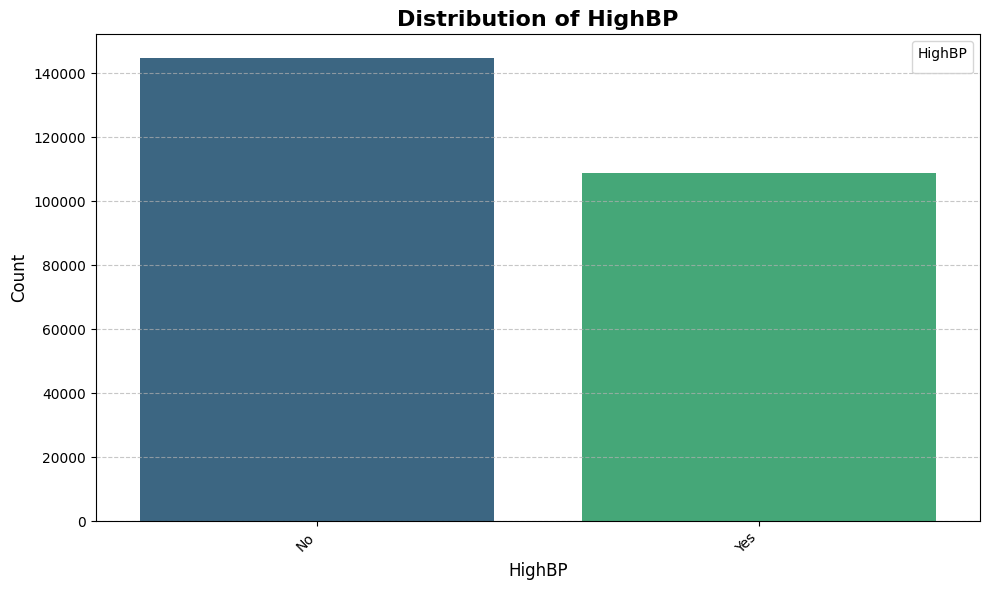

/tmp/ipython-input-13-3699748081.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, loc='upper right', fontsize=10)


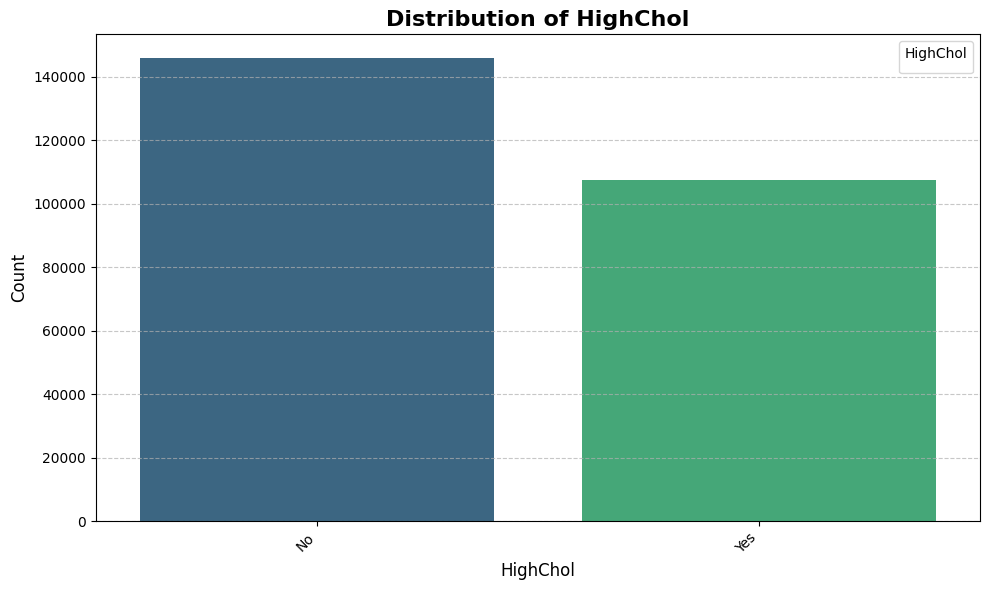

/tmp/ipython-input-13-3699748081.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, loc='upper right', fontsize=10)


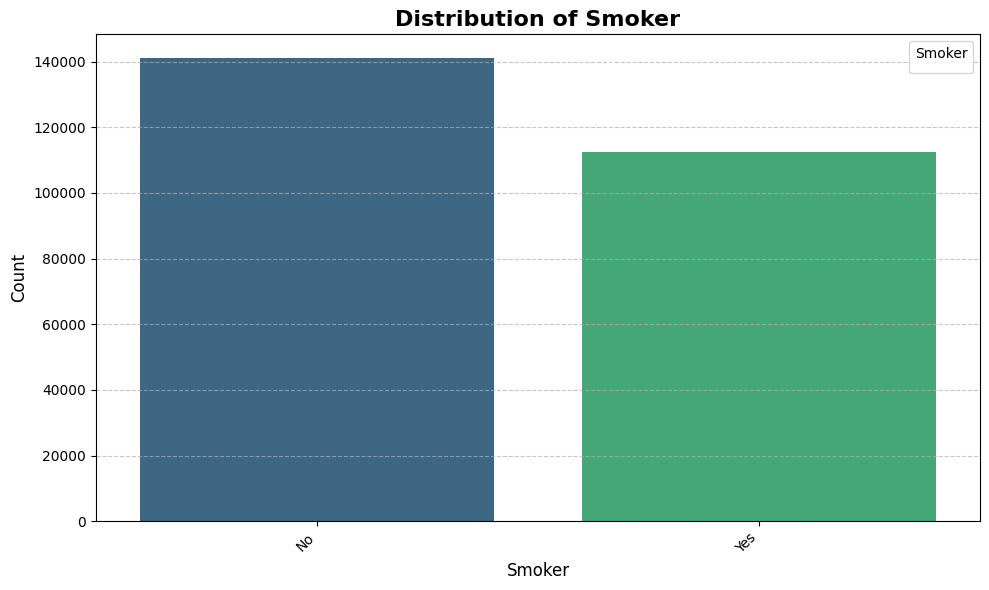

/tmp/ipython-input-13-3699748081.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, loc='upper right', fontsize=10)


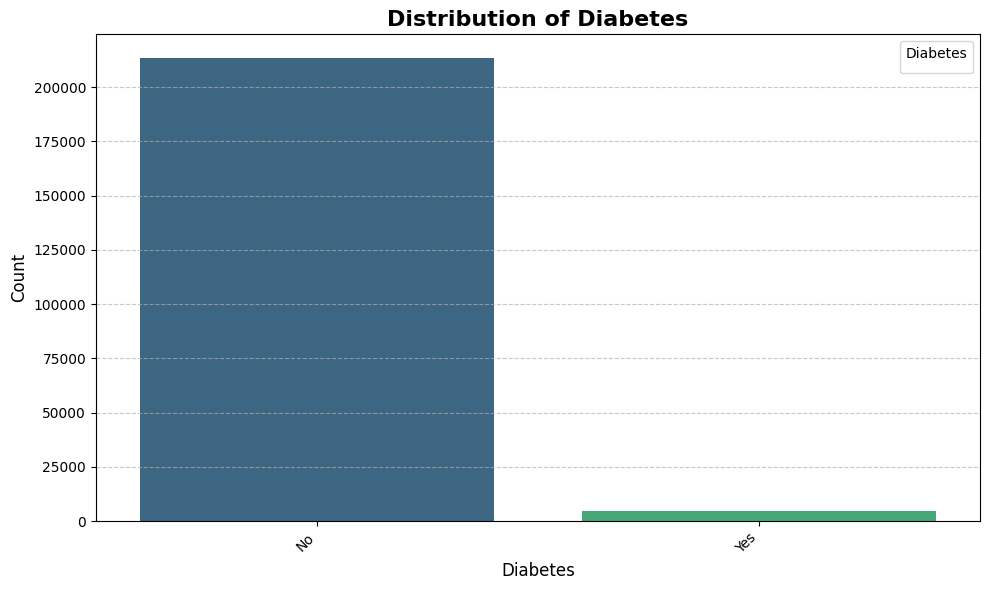

/tmp/ipython-input-13-3699748081.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, loc='upper right', fontsize=10)


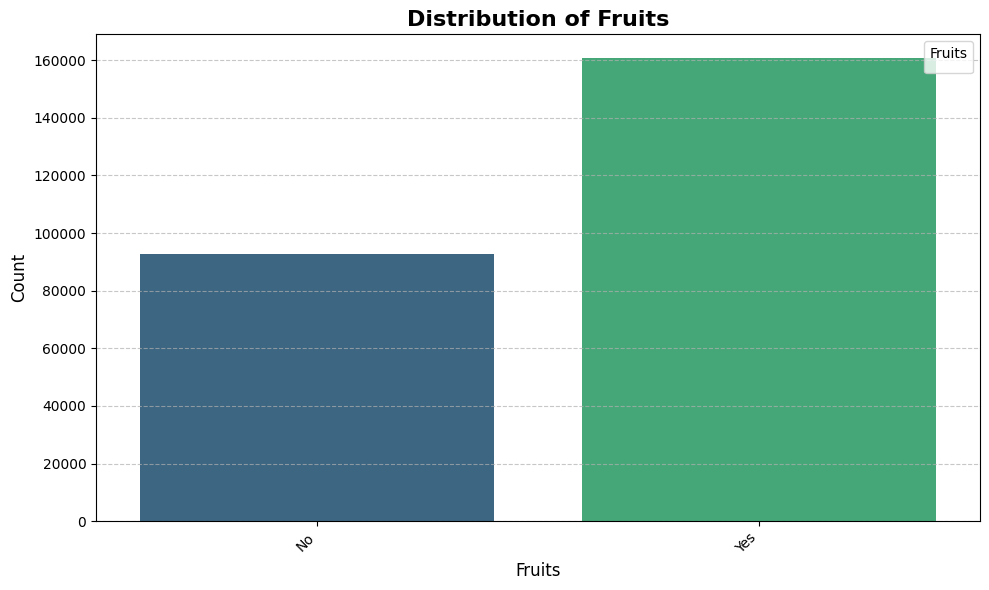

/tmp/ipython-input-13-3699748081.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, loc='upper right', fontsize=10)


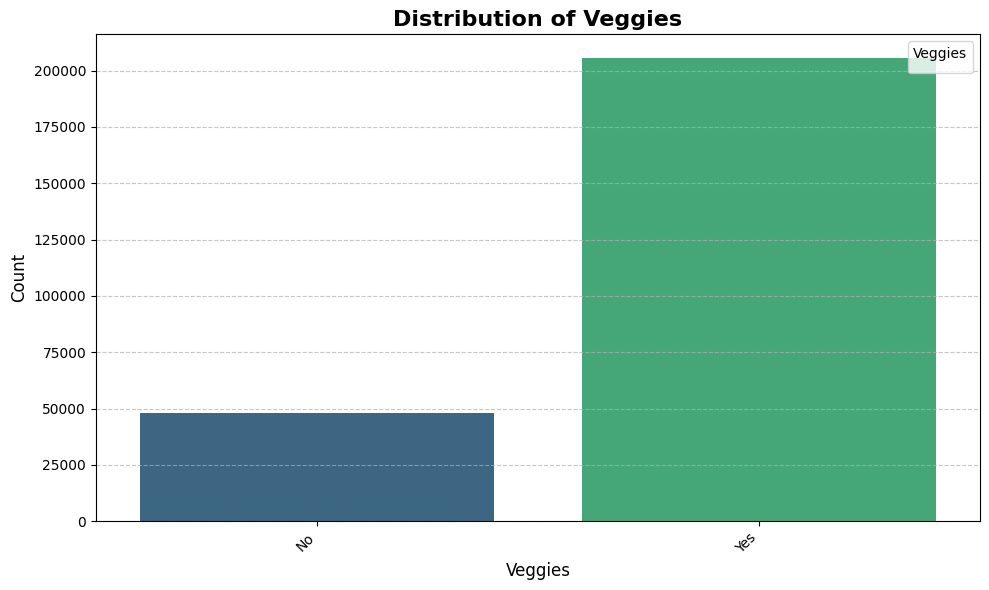

/tmp/ipython-input-13-3699748081.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, loc='upper right', fontsize=10)


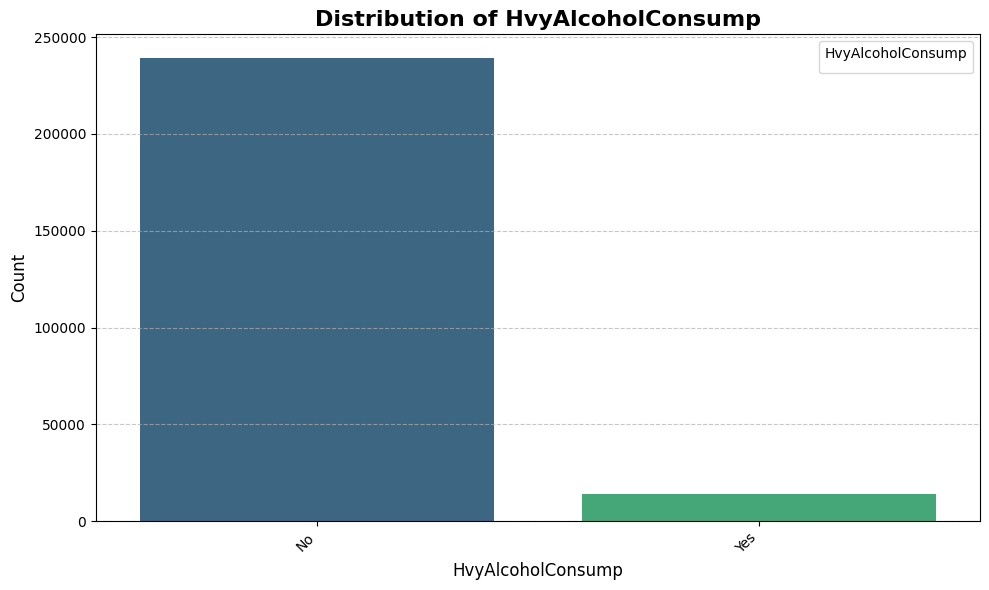

/tmp/ipython-input-13-3699748081.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, loc='upper right', fontsize=10)


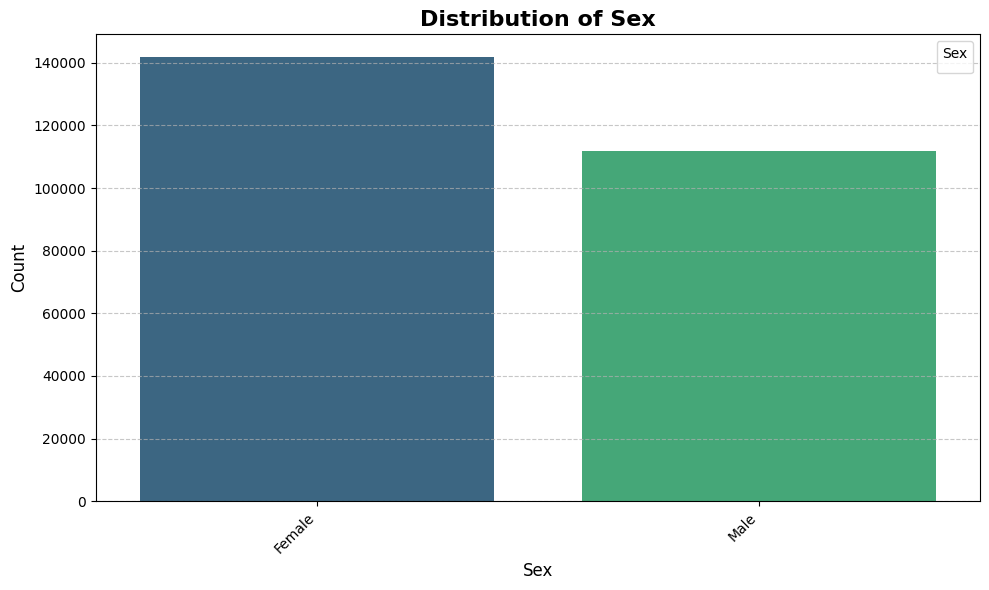

In [13]:
# --- 1. Categorical Feature vs. Target Variable Relationships (Stacked Bar Charts) ---
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv('heartdisease.csv')  # Replace with your dataset path

# Define the specific list of categorical columns for univariate analysis
target_cols_for_univariate = ['HighBP', 'HighChol', 'Smoker', 'Diabetes', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'HeartDiseaseorAttack','Sex']

# Define mappings for binary columns to descriptive labels
binary_value_mappings = {
    0: 'No',
    1: 'Yes'
}

# Convert binary flags to category type and map 0/1 to descriptive labels
binary_cols_to_map = {
    'HeartDiseaseorAttack': {0: 'No Heart Disease', 1: 'Heart Disease'},
    'HighBP': {0: 'No High BP', 1: 'High BP'},
    'HighChol': {0: 'No High Chol', 1: 'High Chol'},
    'Smoker': {0: 'Non-Smoker', 1: 'Smoker'},
    'Diabetes': {0: 'No Diabetes', 1: 'Diabetes'},
    'Fruits': {0: 'No Fruits', 1: 'Eats Fruits'},
    'Veggies': {0: 'No Veggies', 1: 'Eats Veggies'},
    'HvyAlcoholConsump': {0: 'No Heavy Alcohol', 1: 'Heavy Alcohol'},
    'Sex': {0: 'Female', 1: 'Male'} # Assuming 0 for Female, 1 for Male based on common conventions
}

# Specific mapping for Sex (if it were in the list)
sex_mapping = {0: 'Female', 1: 'Male'}

# Process columns to ensure correct categorical type and labels
for col in target_cols_for_univariate:
    # Apply descriptive labels based on common binary 0/1 meaning
    if col == 'HeartDiseaseorAttack':
        df[col] = df[col].map({0: 'No Heart Disease', 1: 'Heart Disease'})
    elif col == 'Sex':
        df[col] = df[col].map({0: 'Female', 1: 'Male'})
    else: # For other binary columns like HighBP, HighChol, Smoker etc.
        df[col] = df[col].map(binary_value_mappings)

    # Crucially, ensure the column is set to 'category' dtype
    df[col] = df[col].astype('category')

#print(df.head)
#print(df.info())
# Select all categorical columns excluding the target variable for plotting against the target
categorical_features_for_plotting = df.select_dtypes(include='category').columns.drop('HeartDiseaseorAttack')

# Define a color palette for stacked bar charts
palette_choice = 'viridis'

for col in categorical_features_for_plotting:
    plt.figure(figsize=(10, 6))
  # Fix: Assign x to hue and set legend=False to apply palette to individual bars and suppress warning
    sns.countplot(x=df[col], hue=df[col], palette="viridis" , legend=False)
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.legend(title=col, loc='upper right', fontsize=10)
    plt.show()
    plt.close()



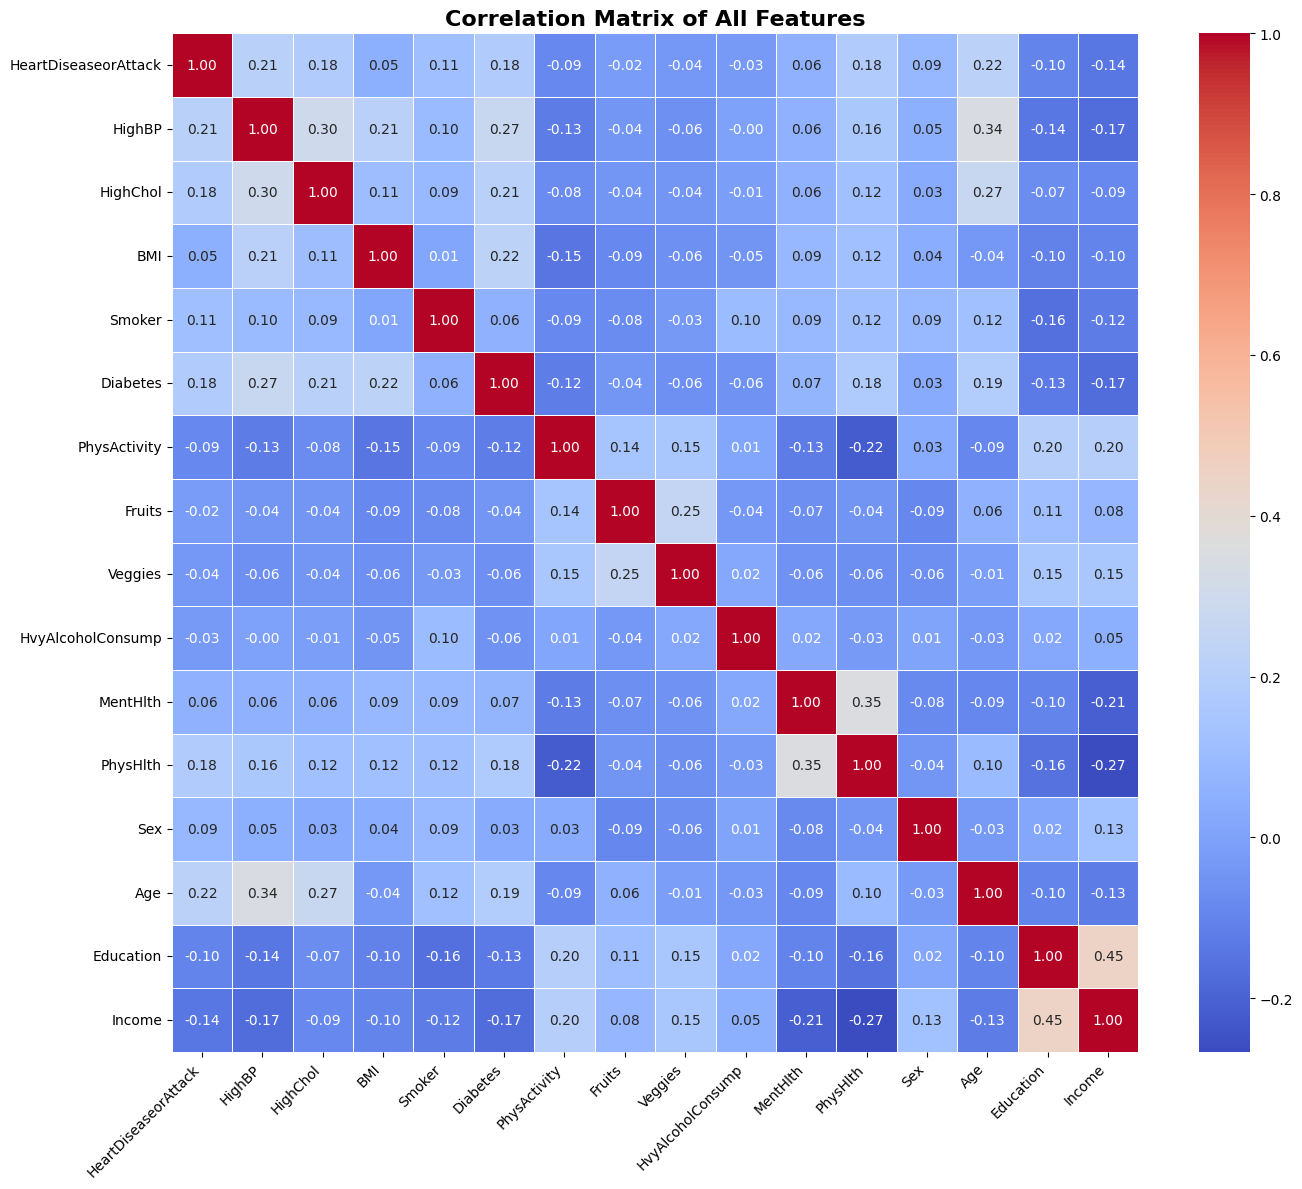

/tmp/ipython-input-8-619727453.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDiseaseorAttack', y=col, palette='pastel')


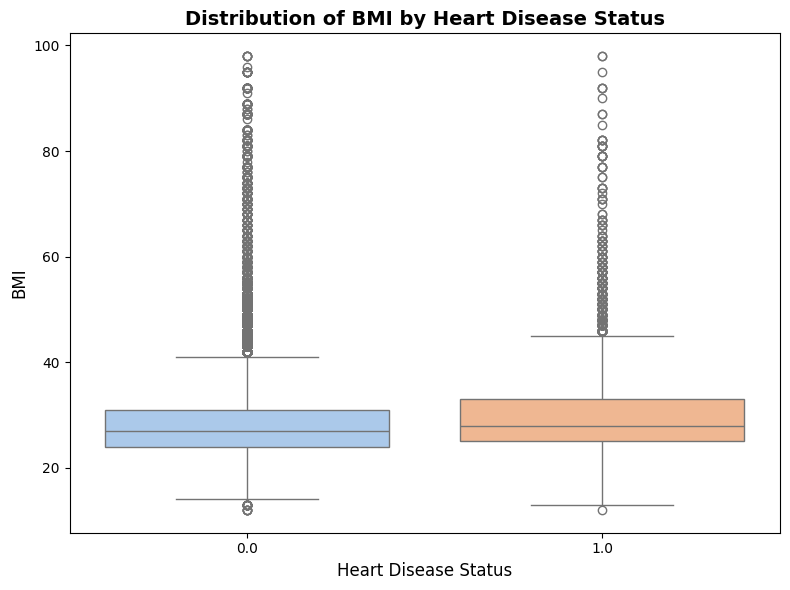

/tmp/ipython-input-8-619727453.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDiseaseorAttack', y=col, palette='pastel')


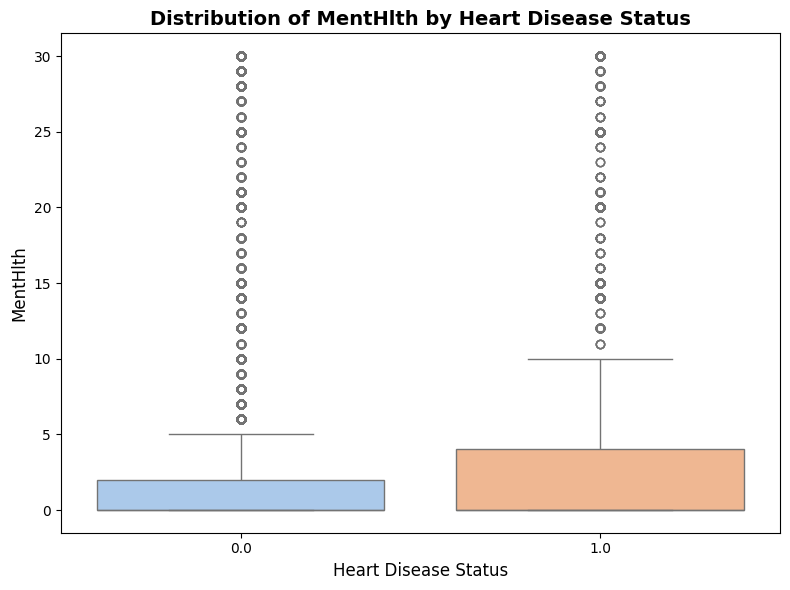

/tmp/ipython-input-8-619727453.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDiseaseorAttack', y=col, palette='pastel')


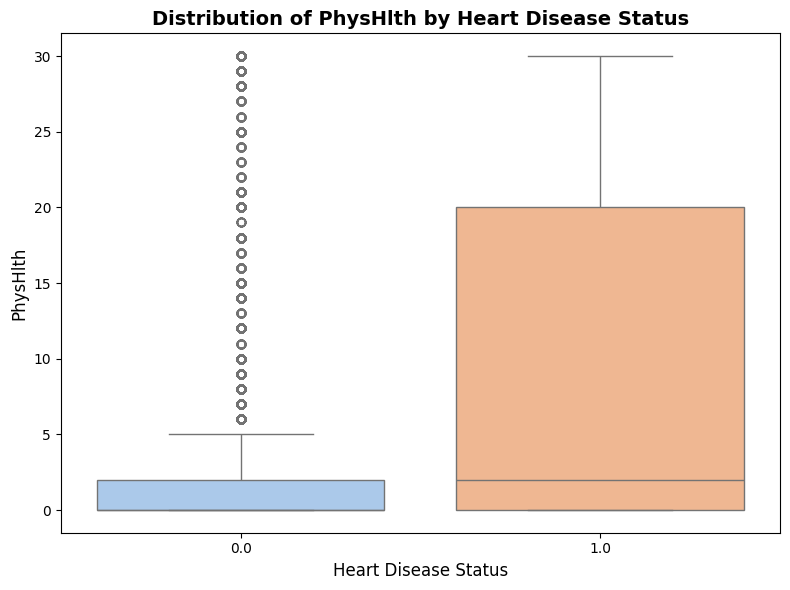

In [8]:
# --- # --- 2. Correlation Matrix --- ---
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 # Prepare a DataFrame for correlation analysis where all relevant columns are numeric
    # Load Dataset
df = pd.read_csv('heartdisease.csv')  # Replace with your dataset path
df_corr = df.copy()

# Numerical columns (BMI, MentHlth, PhysHlth) are already suitable for correlation

plt.figure(figsize=(14, 12))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
plt.close()

# --- 3. Numerical Feature vs. Target Variable Relationships (Box Plots) ---

numerical_features = ['BMI', 'MentHlth', 'PhysHlth']
# 'HeartDiseaseorAttack' column in df is already mapped to descriptive labels from previous steps

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='HeartDiseaseorAttack', y=col, palette='pastel')
    plt.title(f'Distribution of {col} by Heart Disease Status', fontsize=14, fontweight='bold')
    plt.xlabel('Heart Disease Status', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()
    plt.close()